<a href="https://colab.research.google.com/github/Angy-face/Esan-Coding-SS2/blob/main/Customer_Churn_Dataset_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f723dd15fac9b9d0bf884ed1bc6b7e877be19850efbc1b726691f8a511cf5ce4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import kagglehub
import pandas as pd
import shutil as st
from ydata_profiling import ProfileReport

# 1.Data retrieving

In [ ]:
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")
st.move(path,"/content/Data")

KeyboardInterrupt: 

In [ ]:
df  = pd.read_csv("/content/Data/customer_churn_dataset-training-master.csv",index_col=0)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,,,,,,,,,,,
2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0


# 2.Data cleaning

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440833 entries, 2.0 to 449999.0
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [ ]:
df.isna().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [ ]:
df.duplicated().sum()

0

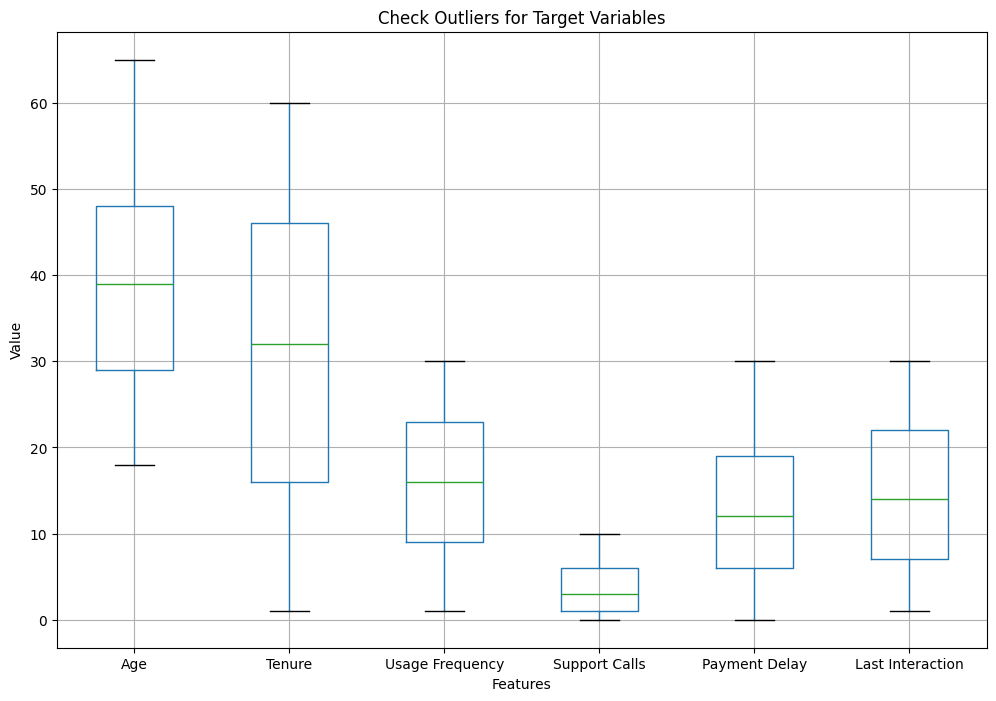

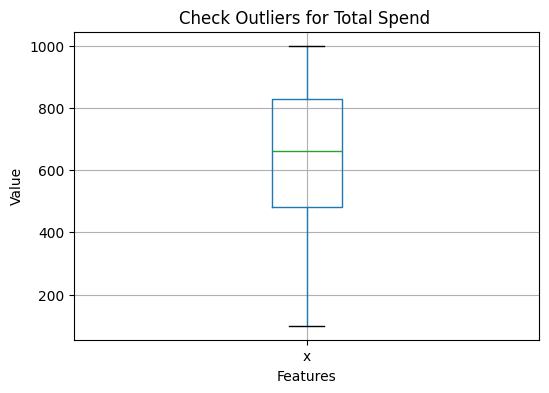

In [ ]:
target = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length',
       'Last Interaction']

# Box plot for target variables
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
pd.plotting.boxplot(df[target])
plt.title("Check Outliers for Target Variables")
plt.xlabel("Features")
plt.ylabel("Value")

# Box plot for Total Spend
plt.figure(figsize=(6, 4))  # Adjust figure size if needed
pd.plotting.boxplot(df["Total Spend"])
plt.title("Check Outliers for Total Spend ")
plt.xlabel("Features")
plt.ylabel("Value")

plt.show()

#3.Data Visualization

##Data Distribution

<ipython-input-11-063fcbcffd33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted', ax=axes[i])
<ipython-input-11-063fcbcffd33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted', ax=axes[i])
<ipython-input-11-063fcbcffd33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted', ax=axes[i])
<ipython-input-11-063fcbcffd33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

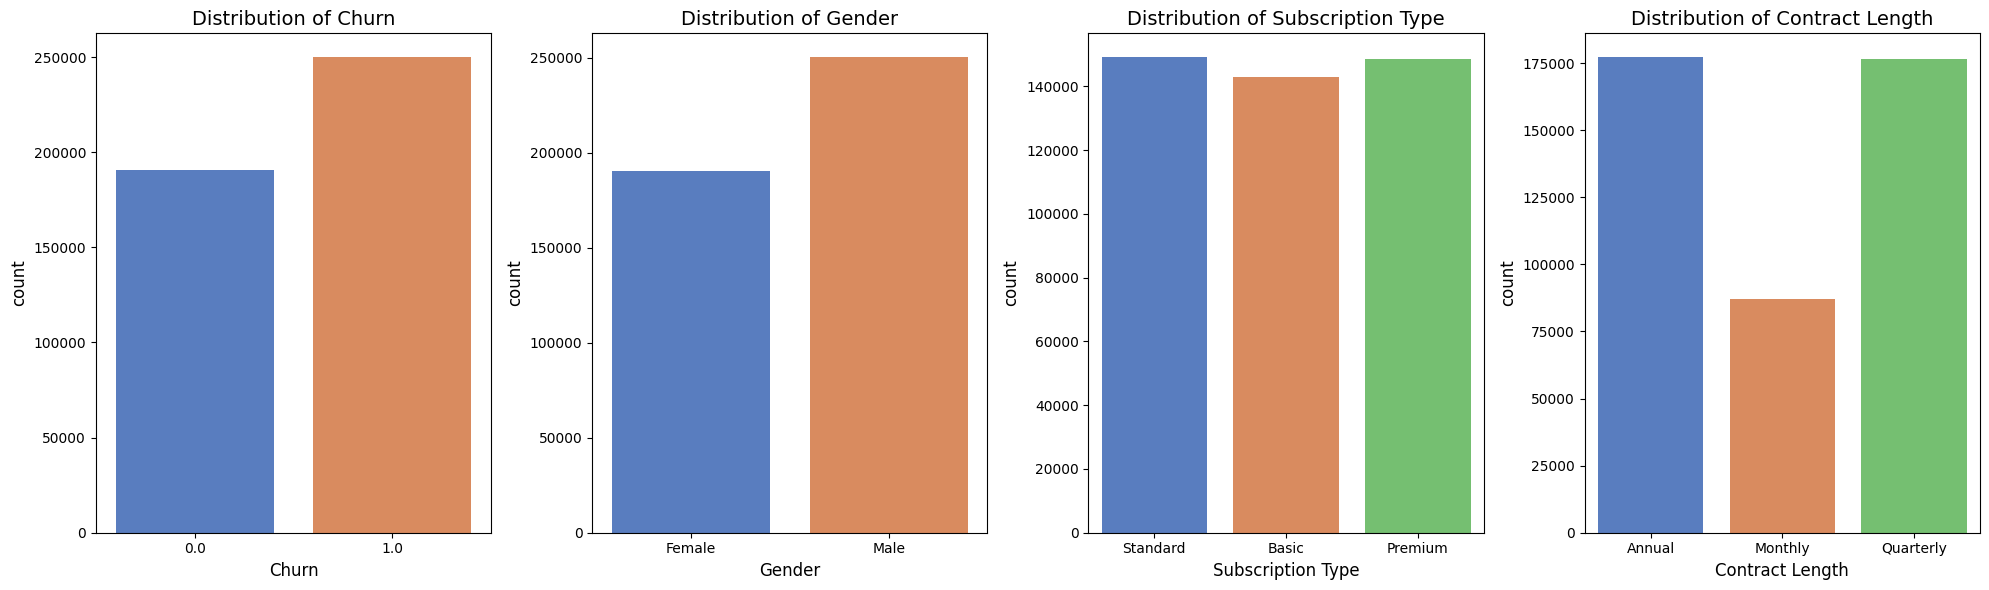

In [ ]:
categorical_cols = ['Churn','Gender', 'Subscription Type', 'Contract Length']
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, palette='muted', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('count', fontsize=12)

plt.tight_layout()
plt.show()

##Data Correlations

In [ ]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


<Axes: >

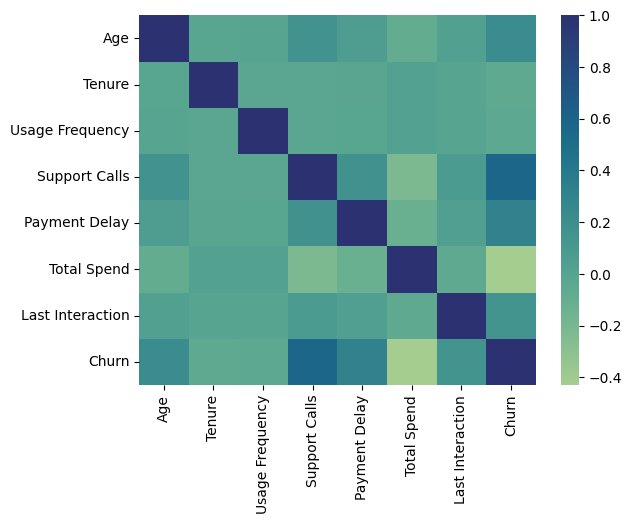

In [ ]:
sns.heatmap(correlation,annot=False,cmap='crest')

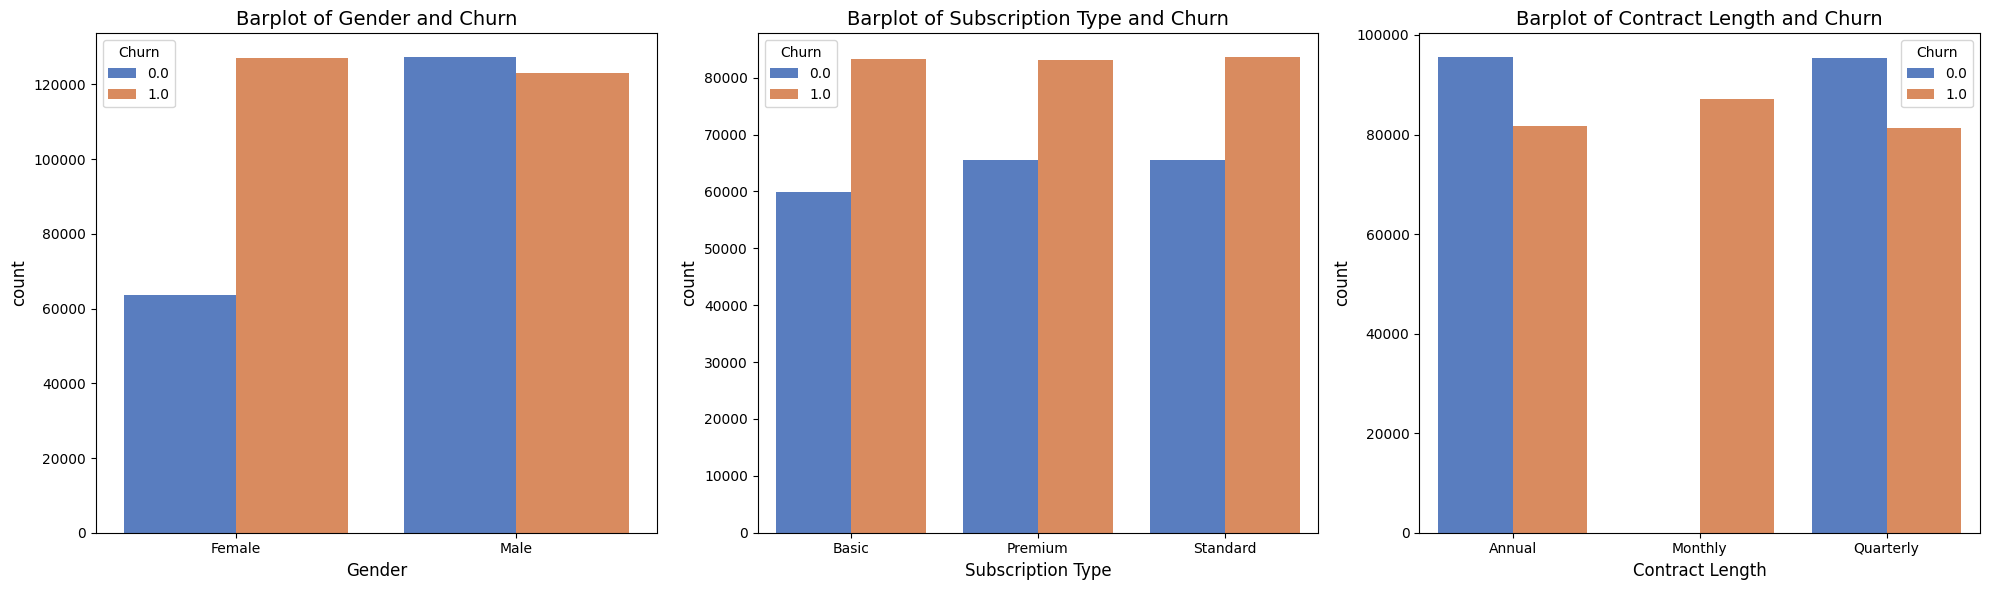

In [ ]:
categorical_cols = ['Gender','Subscription Type', 'Contract Length']
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 6))

for i, col in enumerate(categorical_cols):
    df_churn = df.groupby([col,"Churn"]).size().reset_index(name="count")
    sns.barplot(data=df_churn,x=col,y='count',hue ='Churn',palette='muted',ax = axes[i])
    axes[i].set_title(f'Barplot of {col} and Churn', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('count', fontsize=12)

plt.tight_layout()
plt.show()

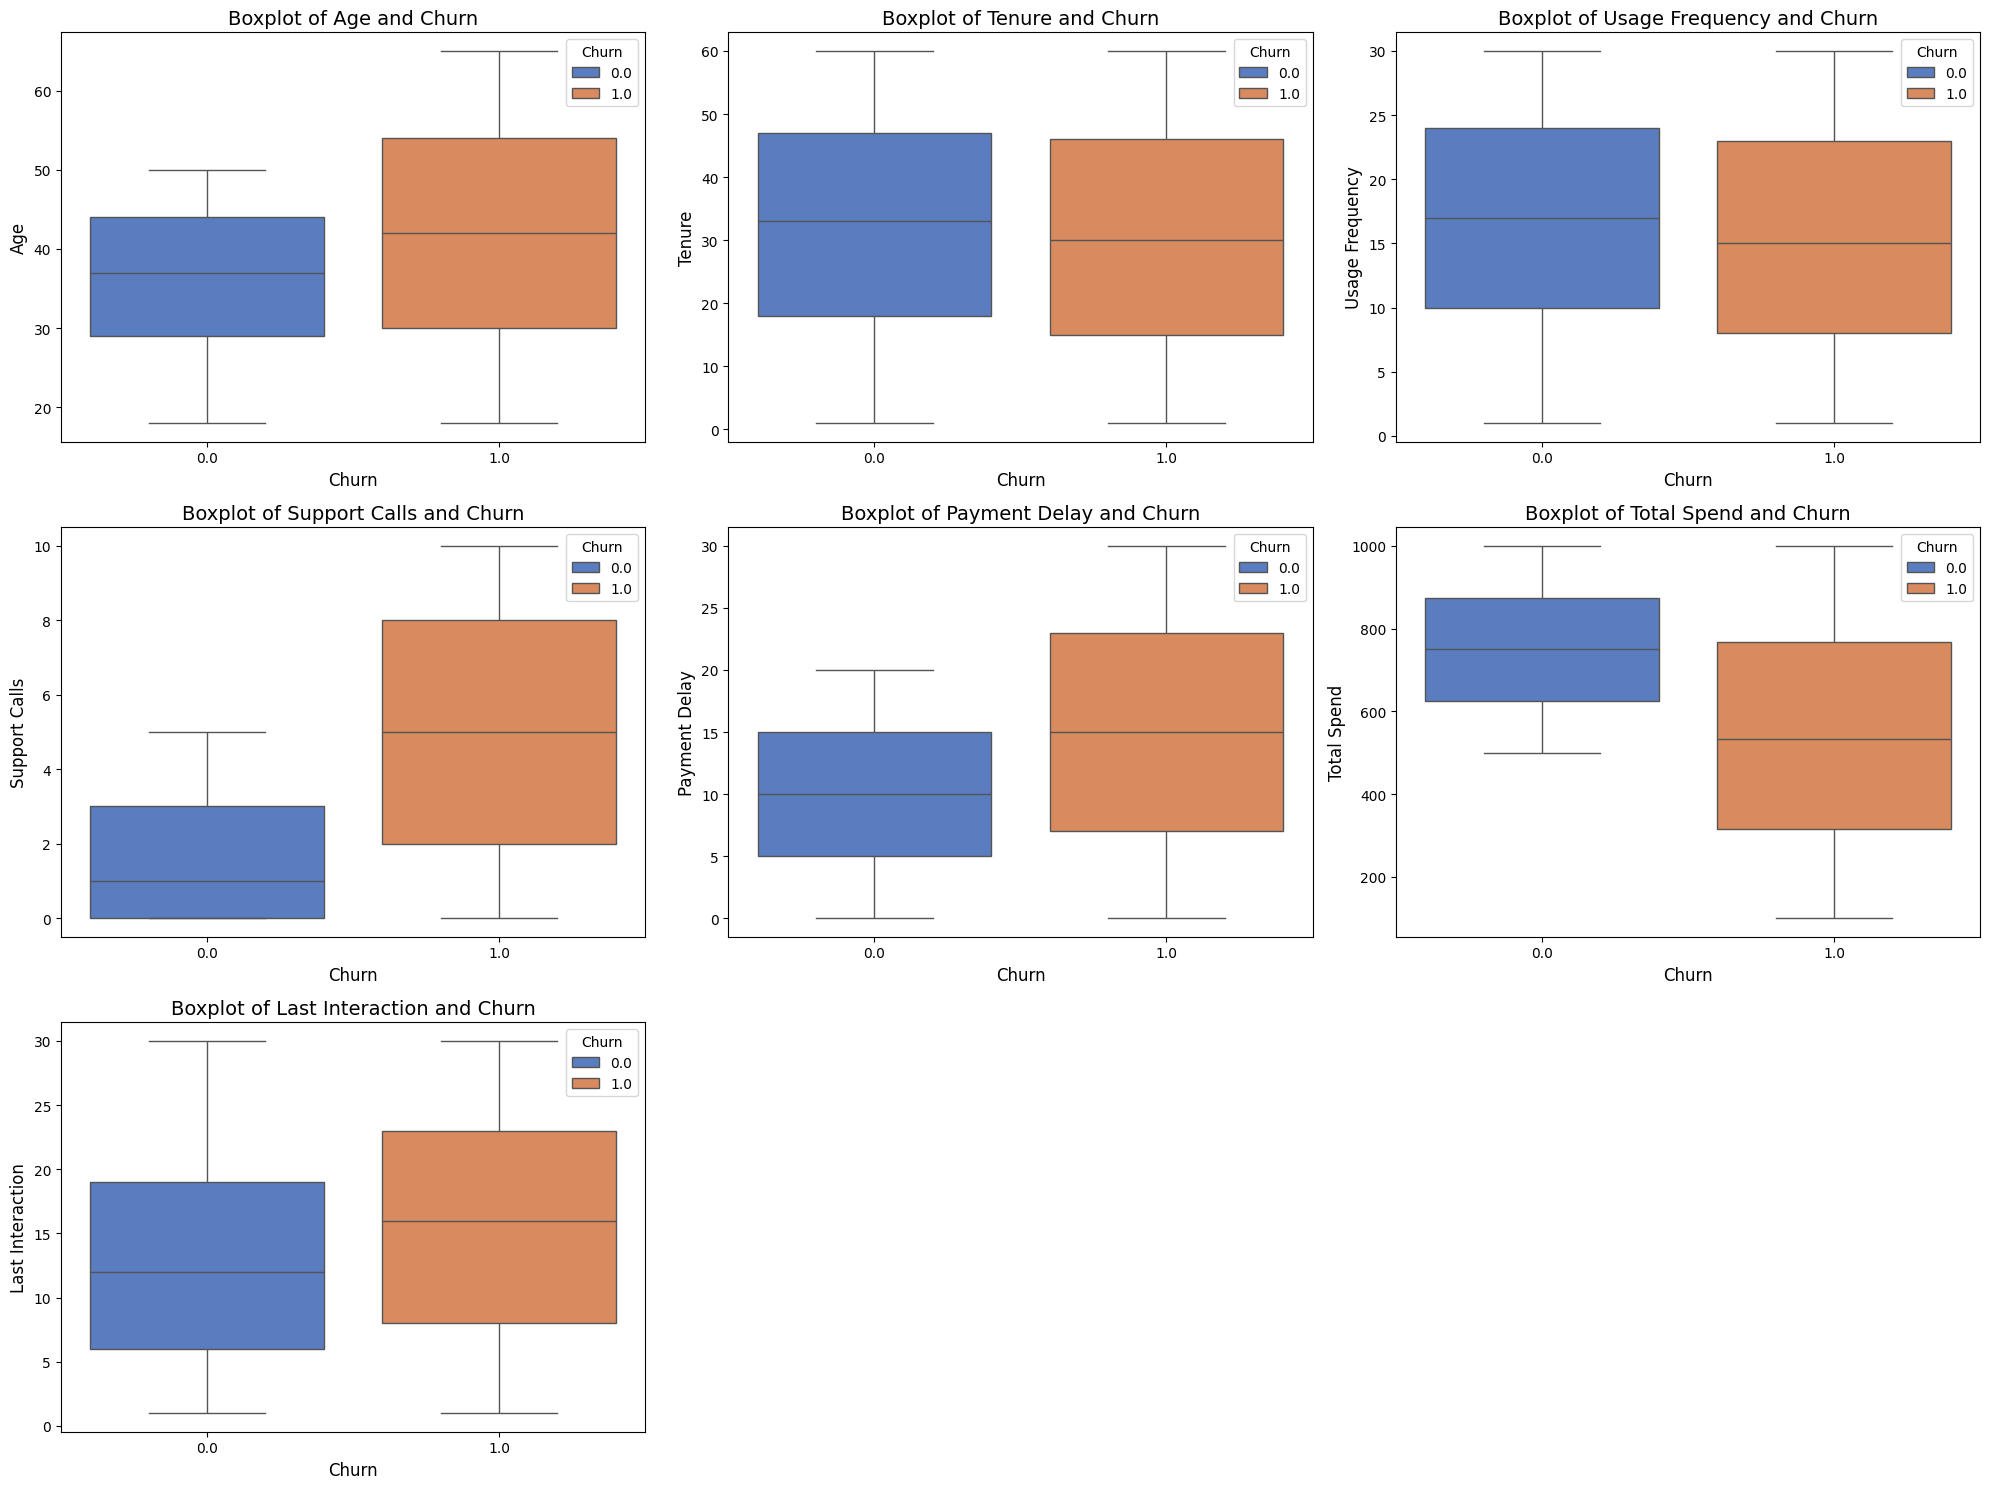

In [ ]:
categorical_cols = ['Age','Tenure', 'Usage Frequency','Support Calls',"Payment Delay","Total Spend","Last Interaction"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df,x="Churn", y=col,palette='muted',ax = axes[i],hue ="Churn")
    axes[i].set_title(f'Boxplot of {col} and Churn', fontsize=14)
    axes[i].set_xlabel("Churn", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
fig.delaxes(axes[7])
fig.delaxes(axes[8])
plt.tight_layout()
plt.show()

#4.Create Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_test = pd.read_csv("/content/Data/customer_churn_dataset-testing-master.csv",index_col=0)
df = pd.concat([df,df_test])
df.dropna(inplace=True)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,,,,,,,,,,,
2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0


In [ ]:
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

scaler = MinMaxScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])
df[["Tenure"]] = scaler.fit_transform(df[["Tenure"]])
df[["Usage Frequency"]] = scaler.fit_transform(df[["Usage Frequency"]])
df[["Support Calls"]] = scaler.fit_transform(df[["Support Calls"]])
df[["Payment Delay"]] = scaler.fit_transform(df[["Payment Delay"]])
df[["Total Spend"]] = scaler.fit_transform(df[["Total Spend"]])
df[["Last Interaction"]] = scaler.fit_transform(df[["Last Interaction"]])

df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,,,,,,,,,,,
2.0,0.255319,0,0.644068,0.448276,0.5,0.600000,2,0,0.924444,0.551724,1.0
3.0,1.000000,0,0.813559,0.000000,1.0,0.266667,0,1,0.507778,0.172414,1.0
4.0,0.787234,0,0.220339,0.103448,0.6,0.600000,0,2,0.094444,0.068966,1.0
5.0,0.851064,1,0.627119,0.689655,0.7,0.233333,2,1,0.328889,0.965517,1.0
6.0,0.106383,1,0.525424,0.655172,0.5,0.266667,0,1,0.574444,0.655172,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64370.0,0.574468,0,0.542373,0.379310,0.6,0.700000,0,2,0.941111,0.448276,1.0
64371.0,0.404255,1,0.084746,0.000000,0.5,0.733333,2,0,0.914444,0.275862,1.0
64372.0,0.148936,1,0.644068,0.448276,0.8,1.000000,1,1,0.252222,0.655172,1.0


In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
CustomerID,,,,,,,,,,
2.0,0.255319,0,0.644068,0.448276,0.5,0.600000,2,0,0.924444,0.551724
3.0,1.000000,0,0.813559,0.000000,1.0,0.266667,0,1,0.507778,0.172414
4.0,0.787234,0,0.220339,0.103448,0.6,0.600000,0,2,0.094444,0.068966
5.0,0.851064,1,0.627119,0.689655,0.7,0.233333,2,1,0.328889,0.965517
6.0,0.106383,1,0.525424,0.655172,0.5,0.266667,0,1,0.574444,0.655172
...,...,...,...,...,...,...,...,...,...,...
64370.0,0.574468,0,0.542373,0.379310,0.6,0.700000,0,2,0.941111,0.448276
64371.0,0.404255,1,0.084746,0.000000,0.5,0.733333,2,0,0.914444,0.275862
64372.0,0.148936,1,0.644068,0.448276,0.8,1.000000,1,1,0.252222,0.655172


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404164, 10), (101042, 10), (404164,), (101042,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9365907246491558


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     22472
         1.0       0.90      1.00      0.95     28049

    accuracy                           0.94     50521
   macro avg       0.95      0.93      0.93     50521
weighted avg       0.94      0.94      0.94     50521



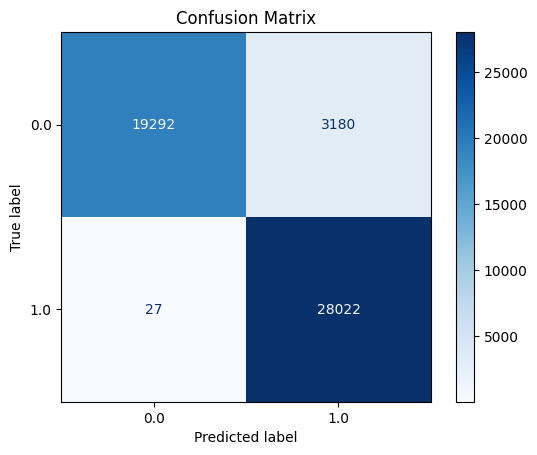

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(16,32,64,128),
                      activation='relu',
                      solver='adam',
                      alpha=0.01,
                      batch_size='auto',
                      learning_rate='adaptive',
                      learning_rate_init=0.01,
                      max_iter=150,
                      random_state=42,
                      verbose=True,
                     momentum=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Iteration 1, loss = 0.27252230
Iteration 2, loss = 0.24015464
Iteration 3, loss = 0.23237415
Iteration 4, loss = 0.22818960
Iteration 5, loss = 0.22516194
Iteration 6, loss = 0.22331509
Iteration 7, loss = 0.22295292
Iteration 8, loss = 0.22225602
Iteration 9, loss = 0.22170457
Iteration 10, loss = 0.22073811
Iteration 11, loss = 0.22095408
Iteration 12, loss = 0.22072564
Iteration 13, loss = 0.22108032
Iteration 14, loss = 0.22027788
Iteration 15, loss = 0.22093836
Iteration 16, loss = 0.22039578
Iteration 17, loss = 0.22048599
Iteration 18, loss = 0.22019679
Iteration 19, loss = 0.21997703
Iteration 20, loss = 0.21869760
Iteration 21, loss = 0.21945774
Iteration 22, loss = 0.21849651
Iteration 23, loss = 0.21999385
Iteration 24, loss = 0.21852959
Iteration 25, loss = 0.21918929
Iteration 26, loss = 0.21821506
Iteration 27, loss = 0.21923342
Iteration 28, loss = 0.21798270
Iteration 29, loss = 0.21808945
Iteration 30, loss = 0.21786126
Iteration 31, loss = 0.21824414
Iteration 32, los

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9312482061737315
0.9323152748362067


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     44943
         1.0       0.90      0.99      0.94     56099

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



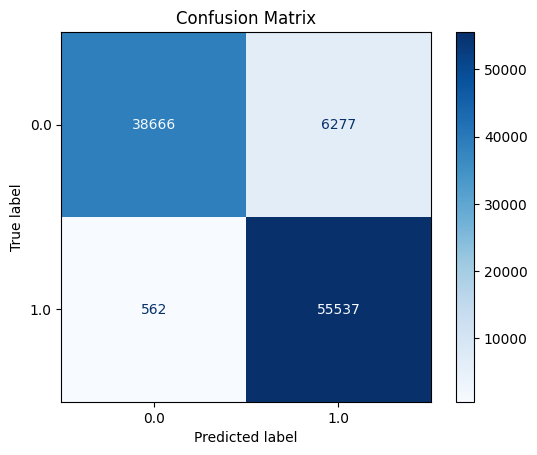

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()